# Run PCA on 100,000 Model Spectra - what dimension is recovered?

For comparison to results from computing embeddings with megaman. Authored by OGT 17-11-01

In [1]:
# imports and plotting setup
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
%matplotlib inline
from astroML.plotting import setup_text_plots
import h5py

from sklearn.decomposition import PCA

np.set_printoptions(suppress=True)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)
mpl.rc('xtick.major', width=2)
mpl.rc('ytick.major', width=2)
mpl.rc('axes', labelsize=18, linewidth=2, titlesize=18)
mpl.rc('figure', titlesize=18)
mpl.rc('lines', linewidth=3)
mpl.rc('legend', fontsize=16)

In [2]:
# load data

f = h5py.File('../data/1e5_spectra_diverseSFH_17-02-07.hdf5','r')
spectra = f['spectra'][:]  # 100,000 model galaxy spectra
wave = f['wave'][:]  # the wavelengths at which the spectra are sampled, 4220 points each
taus = f['taus'][:]  # the exponential decay timescale that characterizes the star formation histories (SFHs)
mean_ages = f['mean_ages'][:]  # the mean stellar age that I calculated for each SFH
zs = f['zs'][:]  # the "metallicity" or metal content of the stellar population
dusts = f['dusts'][:]  # the amount of dust present in the galaxy
sdss_mags = f['sdss_mags'][:]  # the brightness of the spectrum in 5 different "filters" or wavelength regions
fbursts = f['fbursts'][:]  # the fraction of stars in a galaxy formed in an instantaneous burst of star formation
tbursts = f['tbursts'][:]  # the time after the Big Bang (t=0) when that burst of star formation occurred
sf_begins = f['sf_begins'][:]  # the time after the Big Bang when the exponentially-declining SFH begins (no SF before)
f.close()

## Run PCA and check the mean spectrum, eignenspectra, and variance explained

In [3]:
n_components=8
pca = PCA(n_components=n_components)
pca.fit(spectra)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

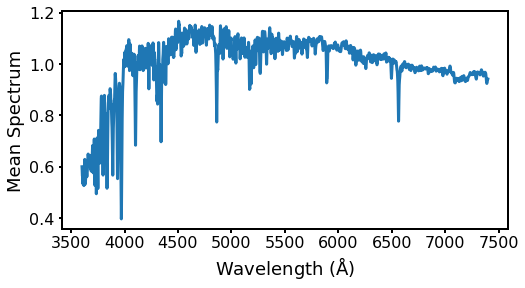

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(wave, pca.mean_)
ax.set_xlabel(r'Wavelength ($\mathrm{\AA}$)')
ax.set_ylabel('Mean Spectrum')

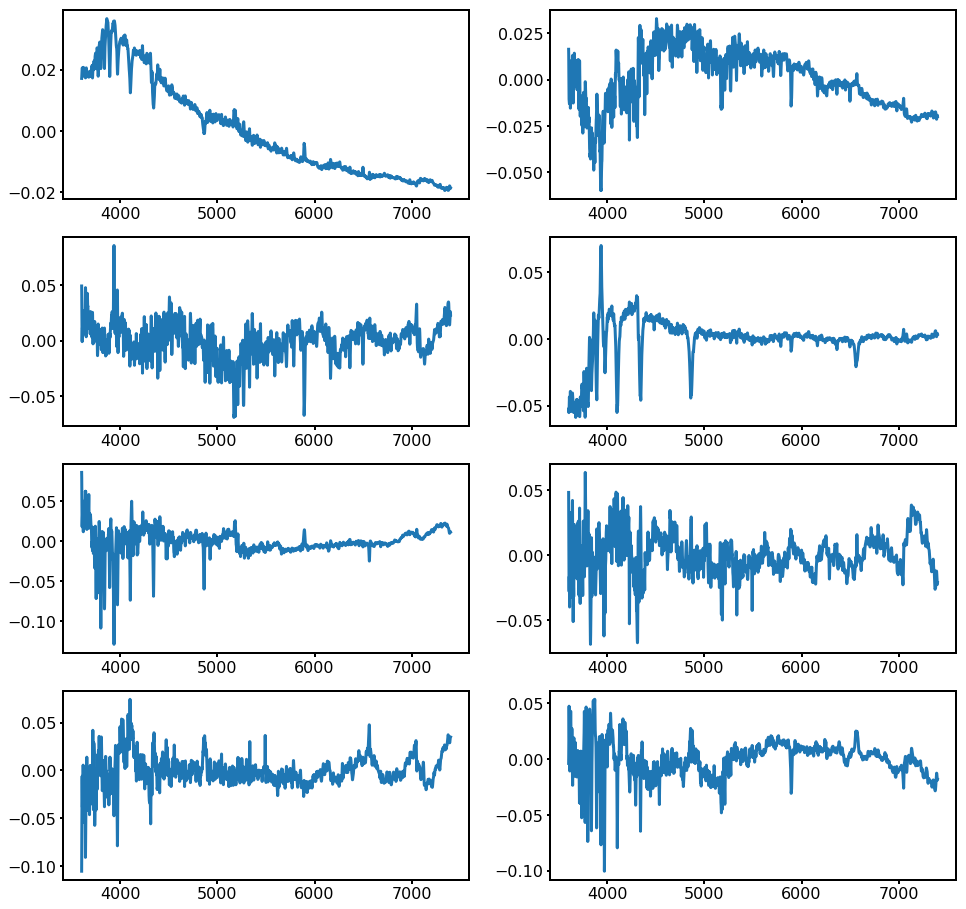

In [7]:
fig, ax = plt.subplots(4,2,figsize=(16,16))
ax = ax.ravel()
for ii in range(n_components):
    ax[ii].plot(wave, pca.components_[ii,:])

[ 98.11502905  99.31575412  99.66430569  99.8707449   99.92612663
  99.95766512  99.97300525  99.98221173]


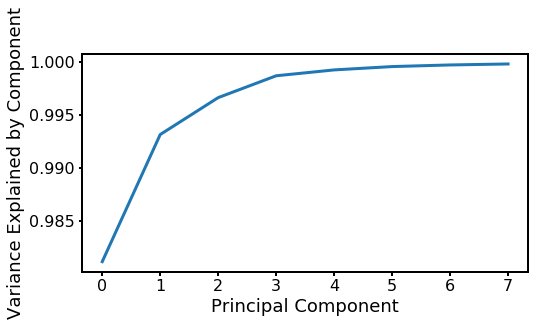

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(8), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained by Component')
print np.cumsum(pca.explained_variance_ratio_) * 100

### So, over 98% of variance is explained by the first component. Including the second gets us over 99% of variance. However, these spectra are noise-free, so that last 0.7% of variance is govered by physics, not noise!

## Transform the data and look for trends between PC0, other components, and parameters

In [10]:
trans = pca.transform(spectra)

In [11]:
def plot_vsdim_cc(ndim, yparam, ccparam, ylabel, cblabel, use_embed):
    fig, ax = plt.subplots(2, ndim/2, figsize=(15,8))
    ax = ax.ravel()
    for ii in range(ndim):
        im = ax[ii].scatter(use_embed[:,ii], yparam, c=ccparam, s=5, lw=0, cmap='viridis')
        ax[ii].set_xlabel('Dimension {}'.format(ii))
    plt.tight_layout()
    cbar_ax = fig.add_axes([0.9, 0.15, 0.025, 0.7])
    cb = fig.colorbar(im, cax=cbar_ax)
    cb.set_label(cblabel)
    ax[0].set_ylabel(ylabel)
    ax[ndim/2].set_ylabel(ylabel)
    plt.draw()
    fig.subplots_adjust(right=0.85, top=0.9)

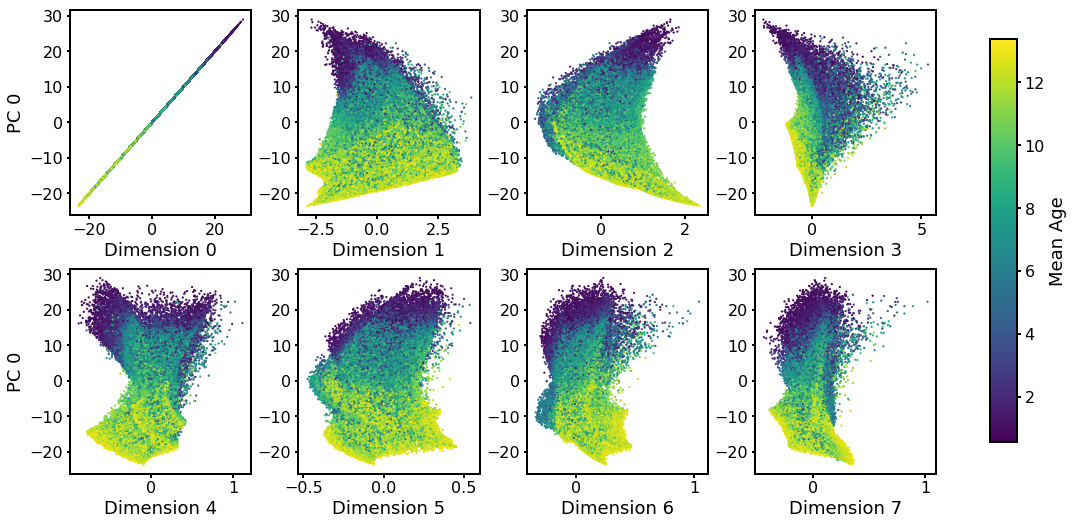

In [13]:
plot_vsdim_cc(n_components, trans[:,0], mean_ages, 'PC 0', 'Mean Age', trans)

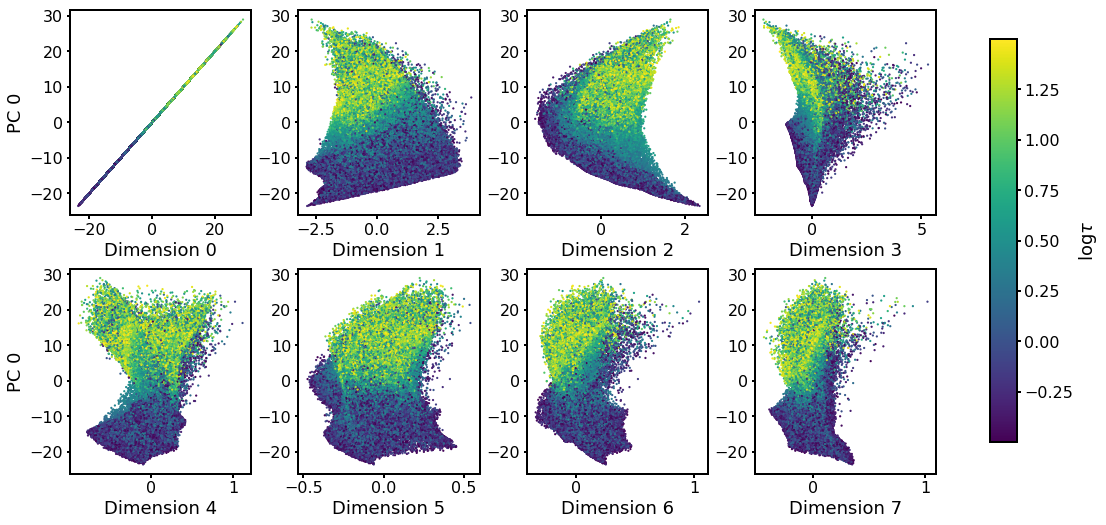

In [16]:
plot_vsdim_cc(n_components, trans[:,0], np.log10(taus), 'PC 0', r'$\log \tau$', trans)

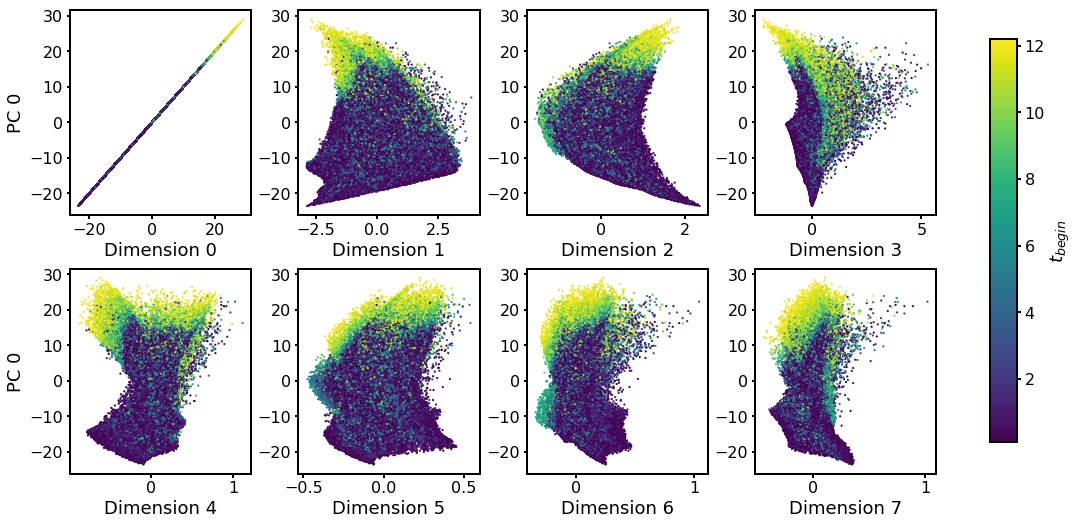

In [17]:
plot_vsdim_cc(n_components, trans[:,0], sf_begins, 'PC 0', r'$t_{begin}$', trans)

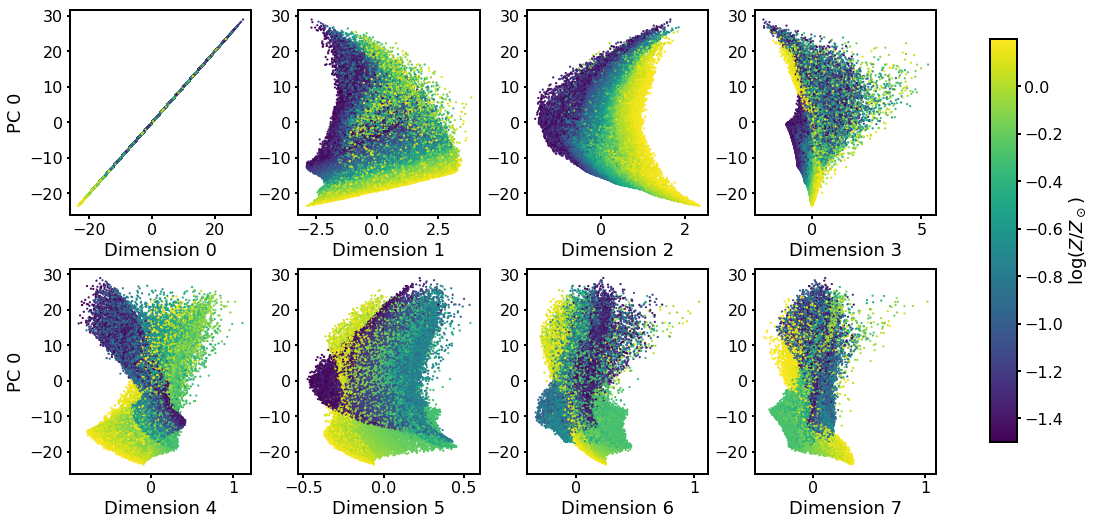

In [18]:
plot_vsdim_cc(n_components, trans[:,0], zs, 'PC 0', r'$\log(Z/Z_\odot)$', trans)

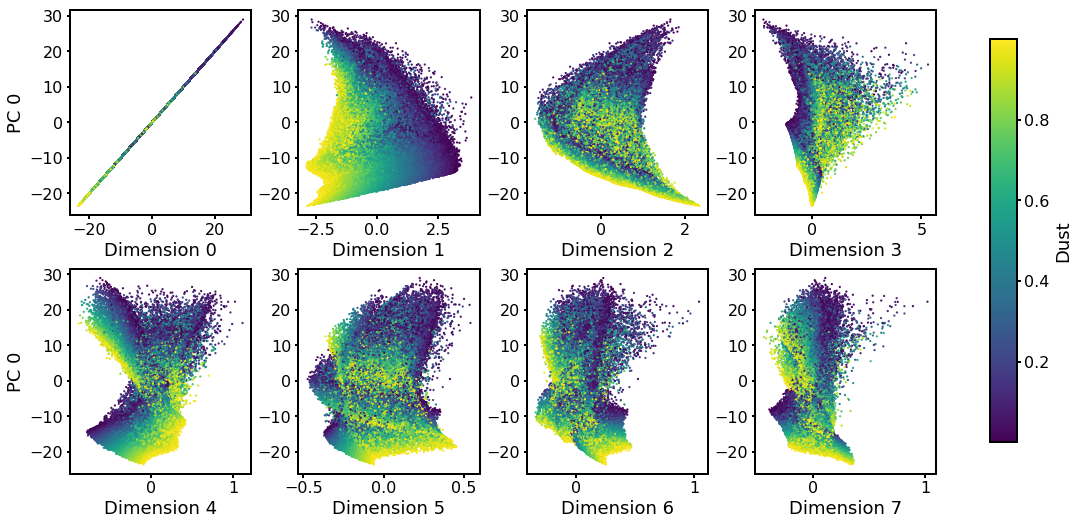

In [19]:
plot_vsdim_cc(n_components, trans[:,0], dusts, 'PC 0', 'Dust', trans)